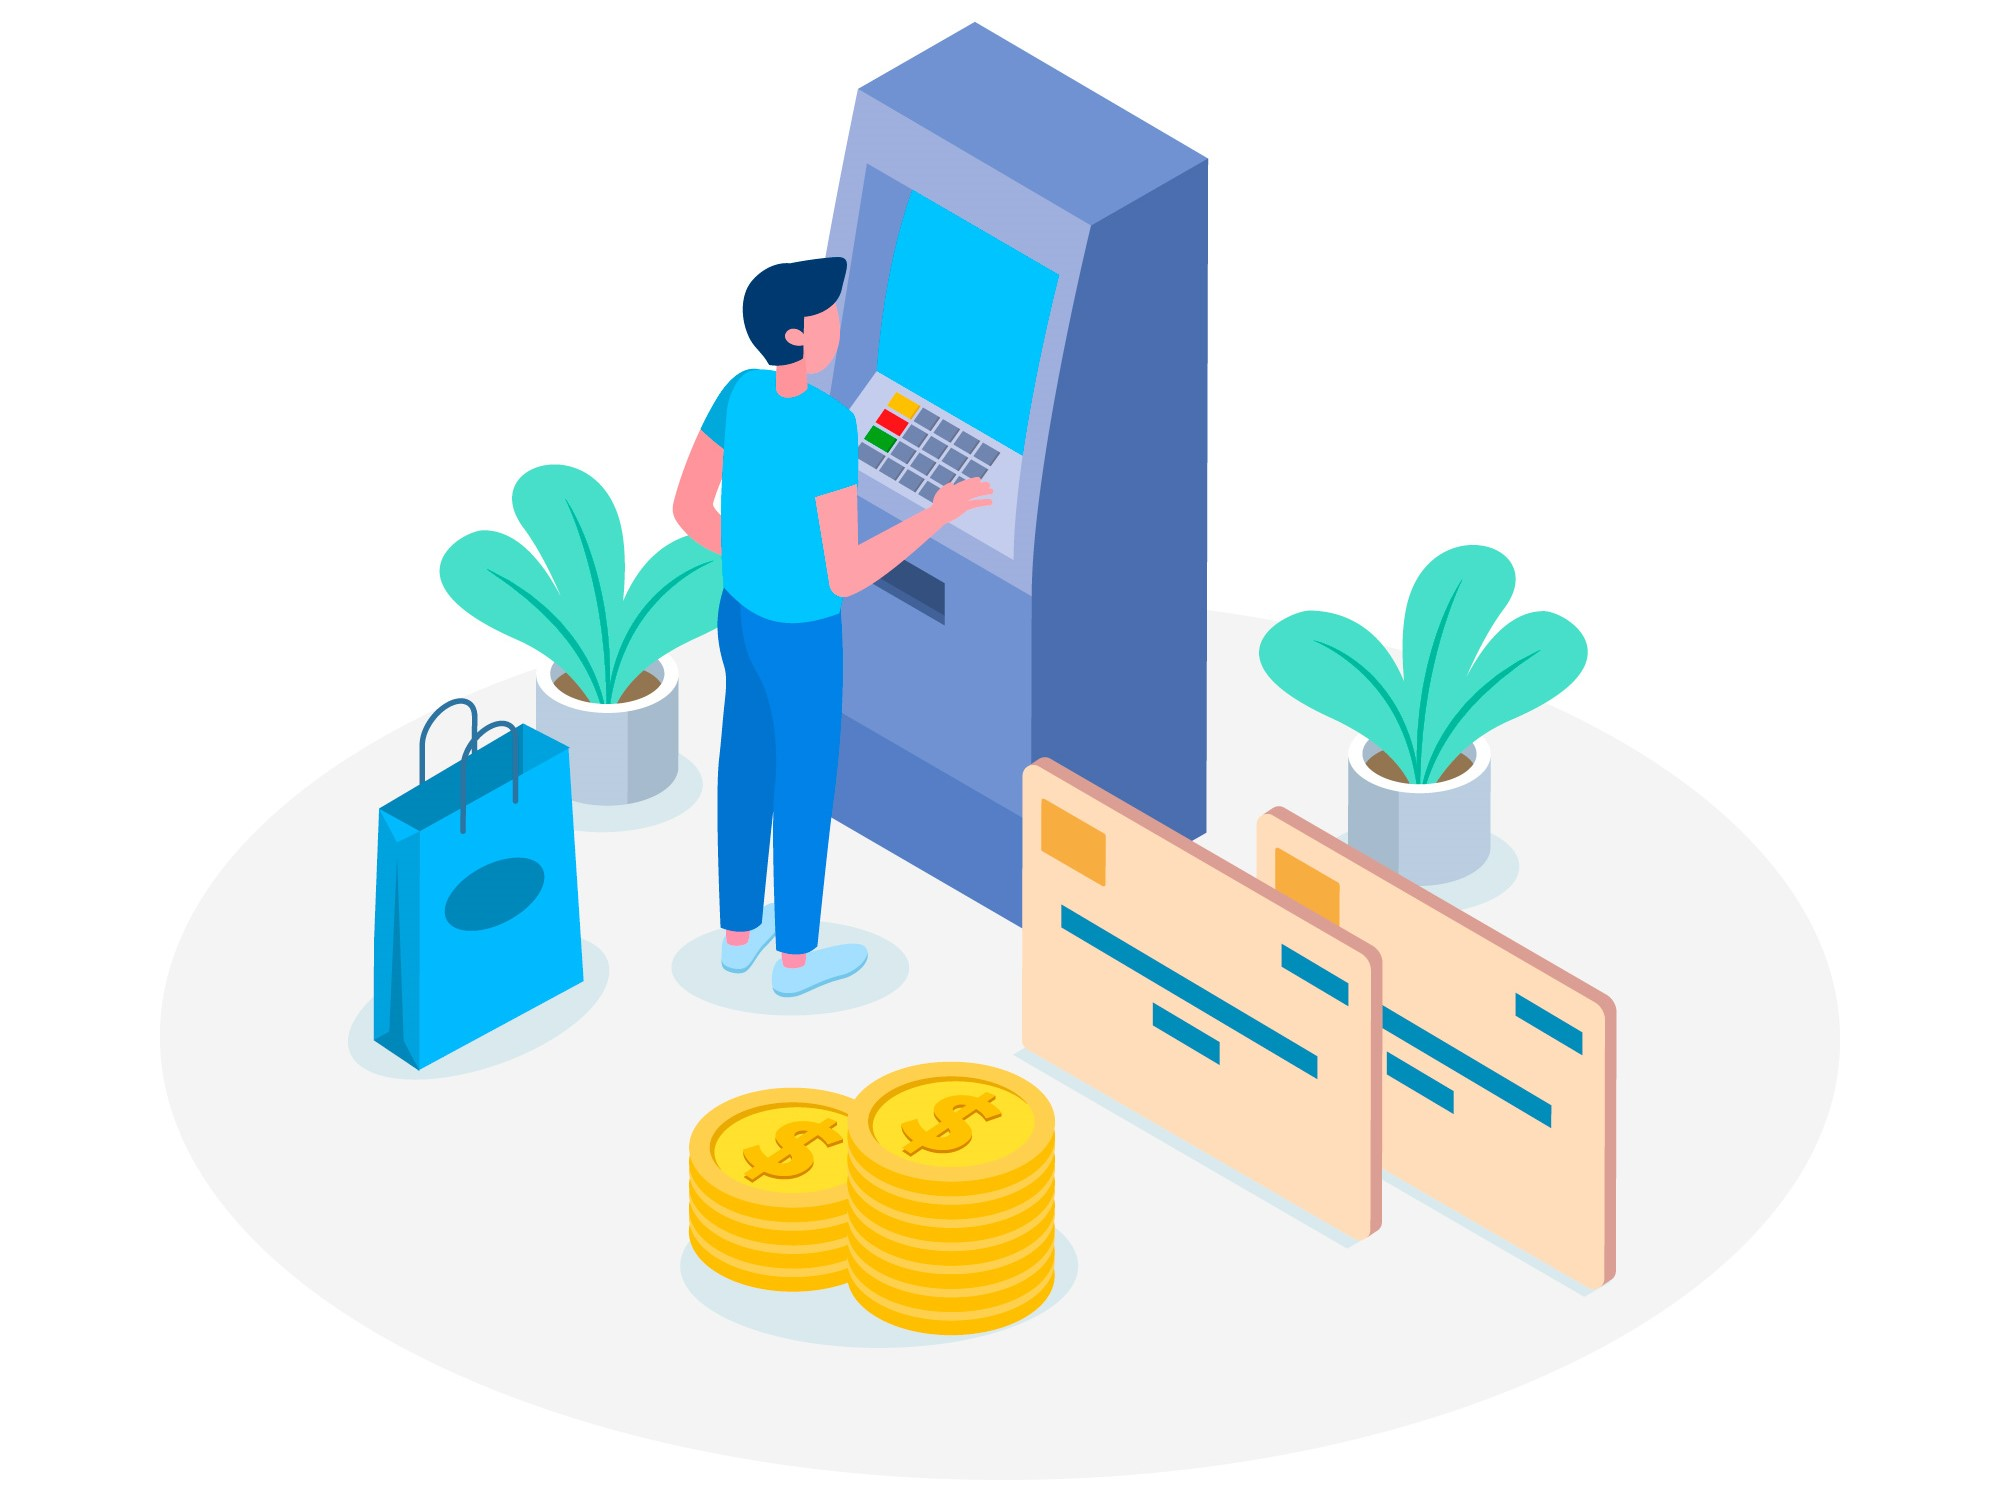

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Business Problem

The aim of bank is to predict which customers will make a specific transaction in the future that means given particular features of customers we have to determine whether this customer will make a transaction or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train(1).csv')
df

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
0       -9.2834  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910   
1        7.0433  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516   
2       -9.0837  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858   
3       -1.8361  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214   
4        2.4486  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942   
...         ...     ...      ...  ...      ...      ...      ...      ...   
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
0       18.5227  -2.3978   7.8784   8.5635  12.7803  -1.0914  
1       15.4305   2.0339   8.1267   8.7889  18.3560   1.9518  
2       21.6042   3.1417  -6.5213   8.2675  14.7222   0.3965  
3       23.0347  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4       13.2876  -1.5121   3.9267   9.5031  17.9974  -8.8104  
...         ...      ...      ...      ...      ...      ...  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[200000 rows x 202 columns]

# Attribute Information:

The dataset is anonymized so we cannot know which feature is what. There are a total of 200 features in this data set along with ID_code and target columns. The target columns contain 0 and 1 value where 0 means the customer will not do a transaction and 1 means the customer will do a transaction.
since the ID_code is column of unique strings and it doesn't contibute in the prediction it is being dropped from the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
df.describe().style.background_gradient(cmap='Pastel1')

# Checking for all missing values in dataset

In [ ]:
# finding missing values present if any
def missing_values(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_values(df)

ID_code target    var_0    var_1    var_2    var_3    var_4    var_5  \
Total         0      0        0        0        0        0        0        0   
Percent     0.0    0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Types    object  int64  float64  float64  float64  float64  float64  float64   

           var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
Total          0        0  ...        0        0        0        0        0   
Percent      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
Types    float64  float64  ...  float64  float64  float64  float64  float64   

         var_195  var_196  var_197  var_198  var_199  
Total          0        0        0        0        0  
Percent      0.0      0.0      0.0      0.0      0.0  
Types    float64  float64  float64  float64  float64  

[3 rows x 202 columns]

In [ ]:
data = df.copy()
data.drop('ID_code' , axis = 1, inplace = True)

# Exploratory Data Analysis (EDA)

Different values in target:
 0    179902
1     20098
Name: target, dtype: int64

There are 10.049% target values with 1


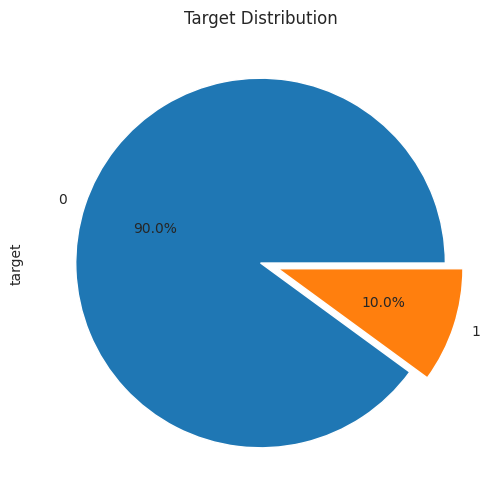

In [ ]:
# checking for the balance of dataset based on the target column
target = data['target']
print('Different values in target:\n',target.value_counts())
print('')
print("There are {}% target values with 1".format(100 *target.value_counts()[1]/(target.value_counts()[1] + target.value_counts()[0])))

plt.figure(figsize=(10,6))
plt.title('Target Distribution')
data['target'].value_counts().plot.pie(autopct='%1.1f%%', explode=([0,0.1]))
plt.show()

its clearly visible that our dataset in very much imbalanced based on the target columns. This has to be rectified inorder to avoid overfiiting of the model.

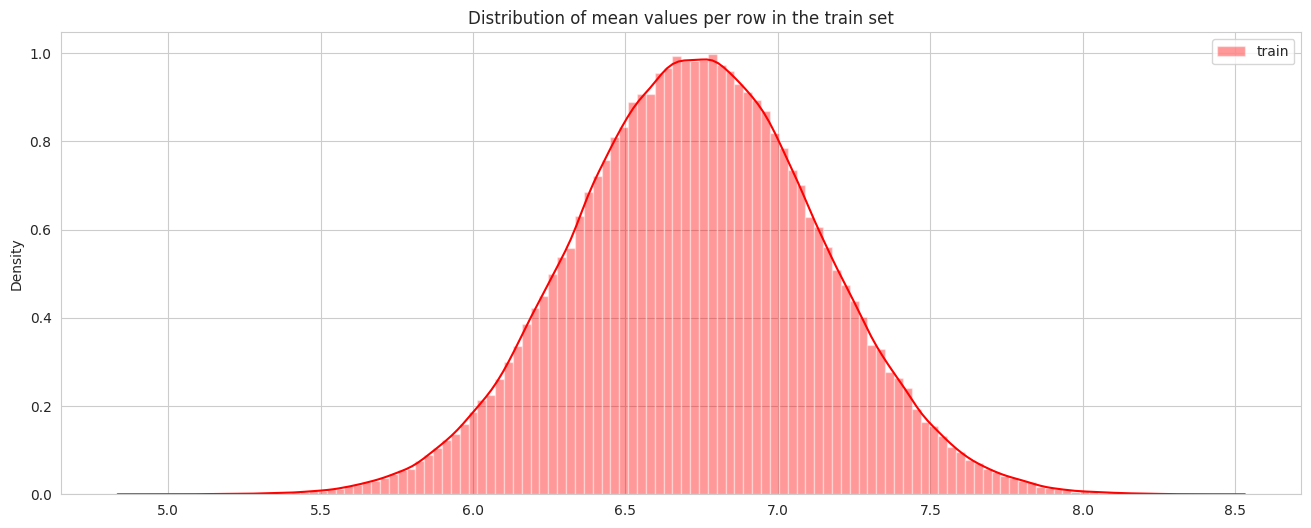

In [ ]:
plt.figure(figsize=(16,6))
features = data.columns.values[:]
plt.title("Distribution of mean values per row in the train set")
sns.distplot(data[features].mean(axis=1),color="red", kde=True,bins=120, label='train')
plt.legend()
plt.show()

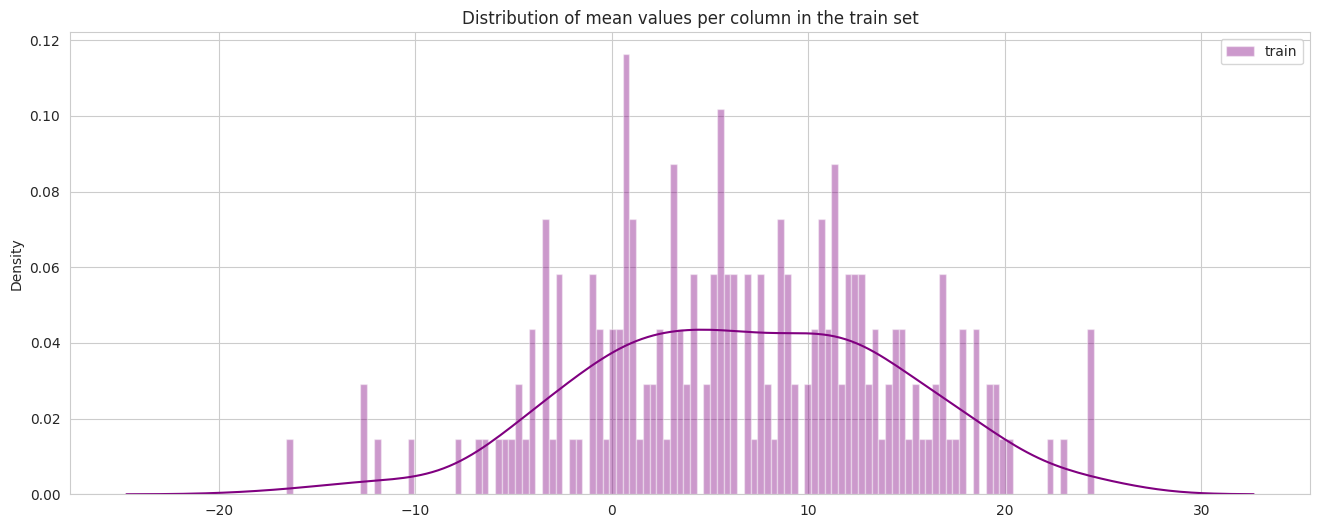

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(data[features].mean(axis=0),color="purple",kde=True,bins=120, label='train')

plt.legend()
plt.show()

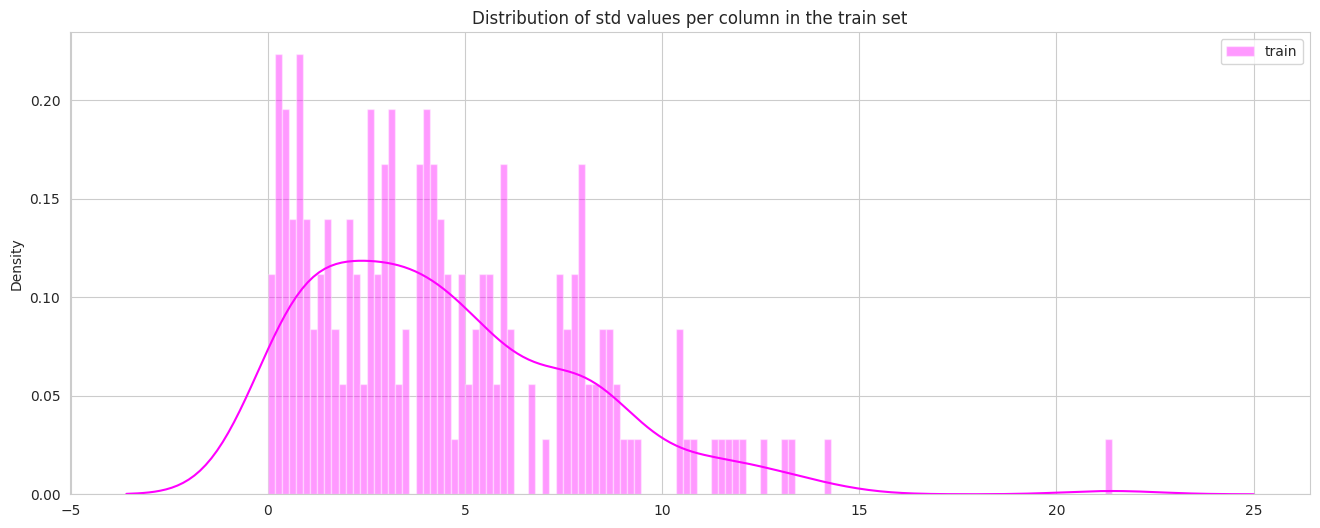

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train set")
sns.distplot(data[features].std(axis=0),color="magenta",kde=True,bins=120, label='train')
plt.legend(); plt.show()

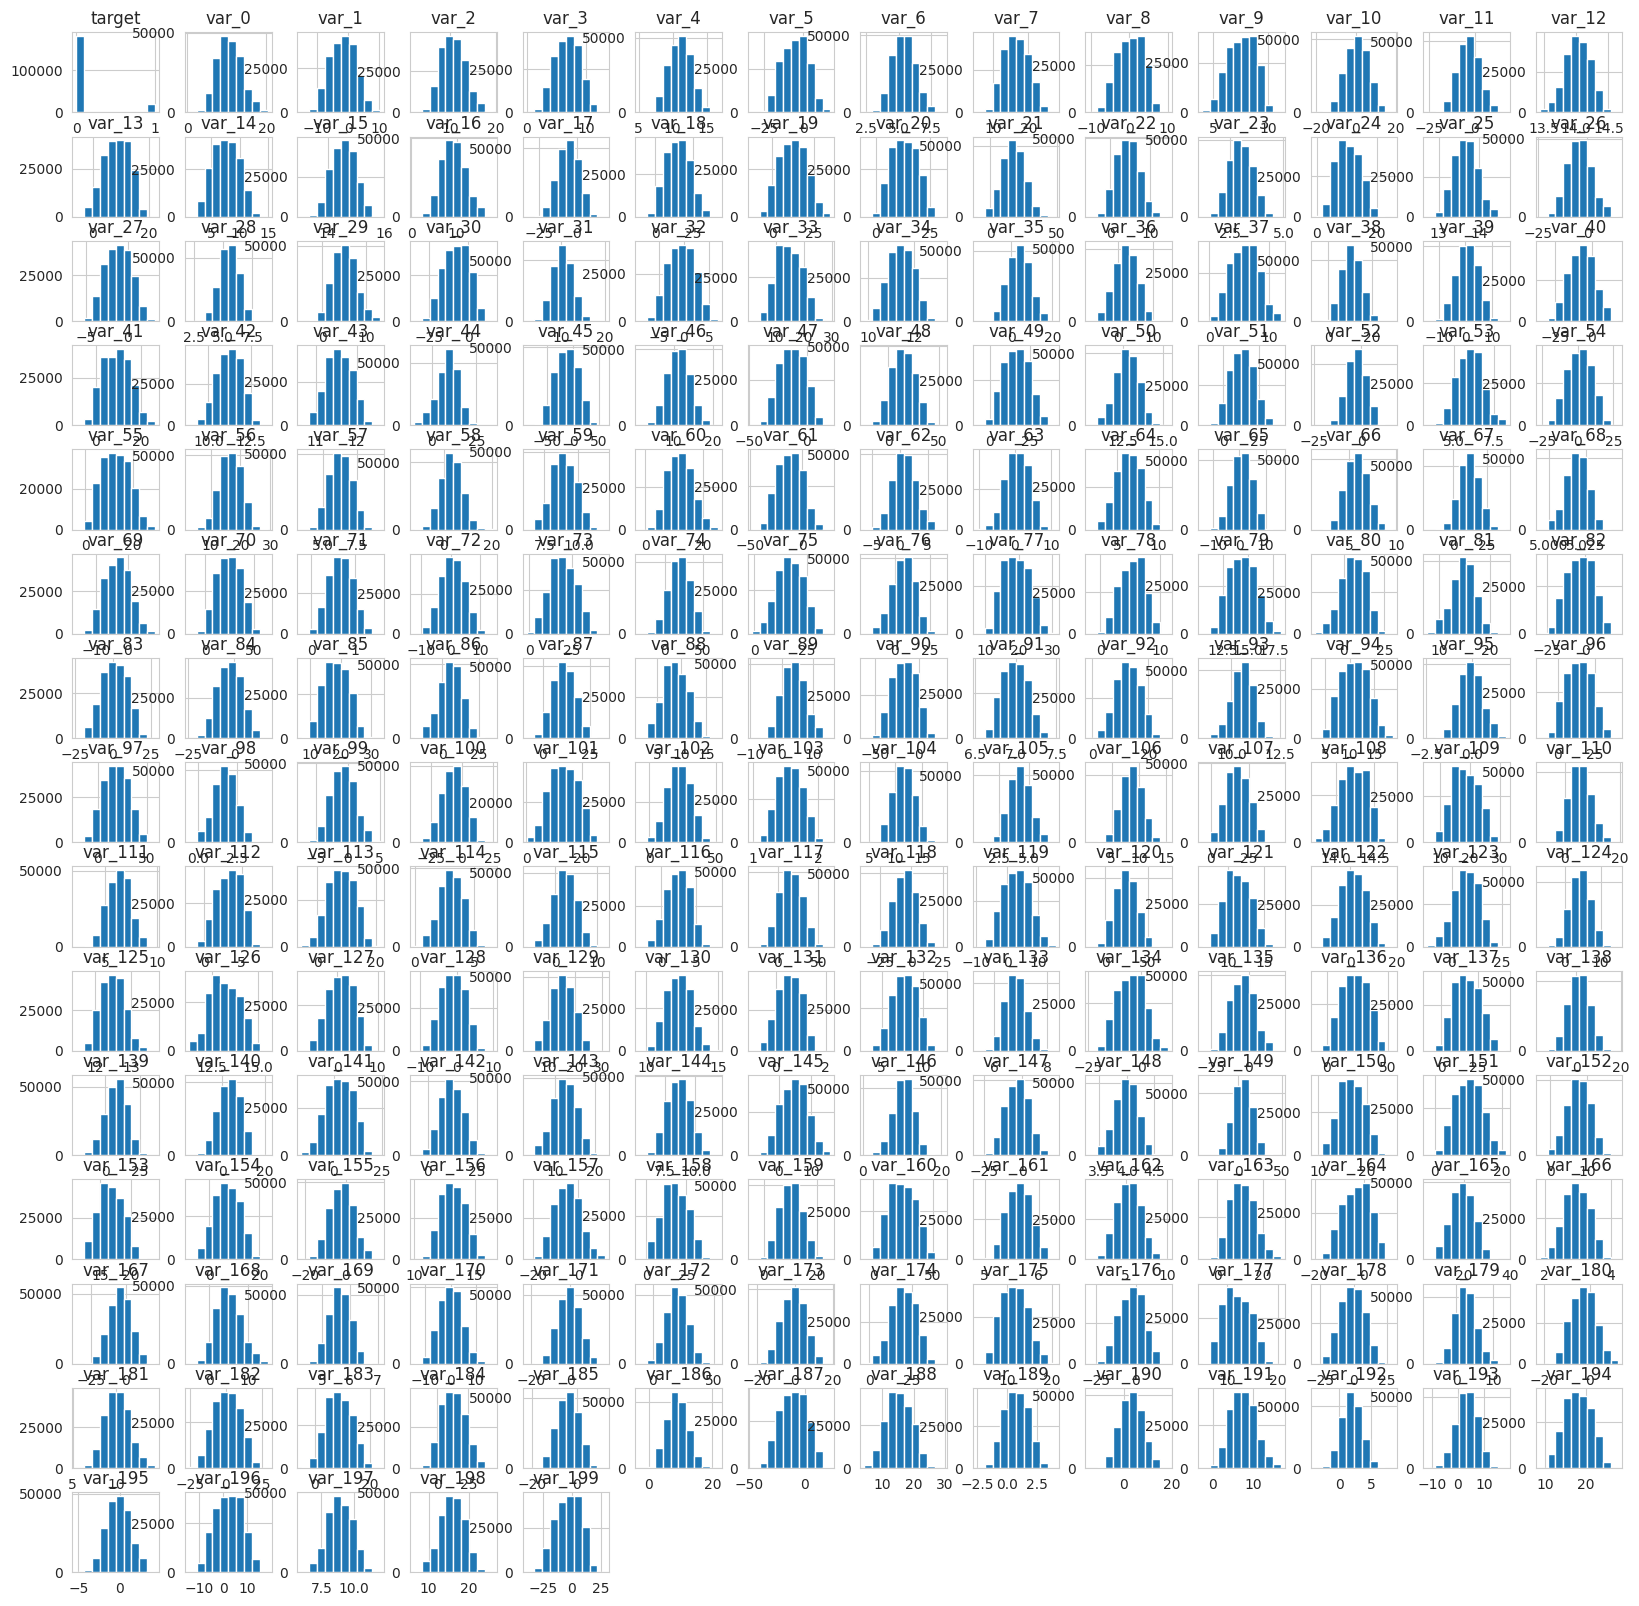

In [ ]:
data.hist(figsize=(20,20))
plt.show()

<Axes: >

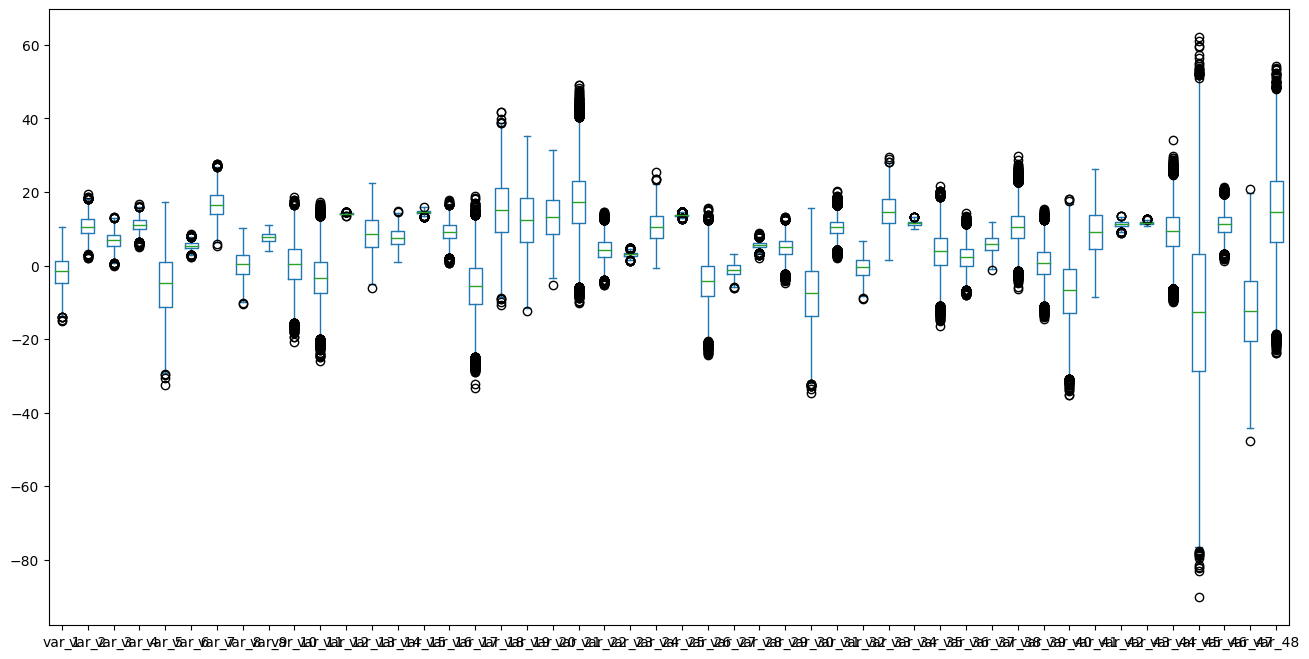

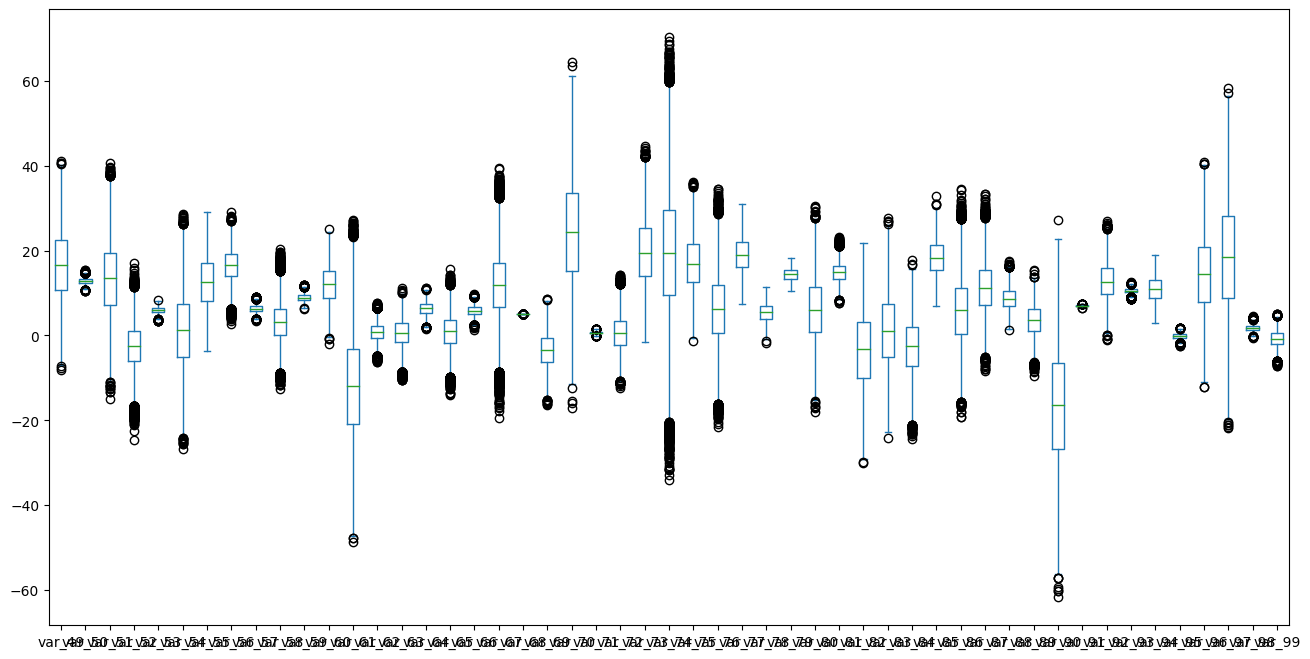

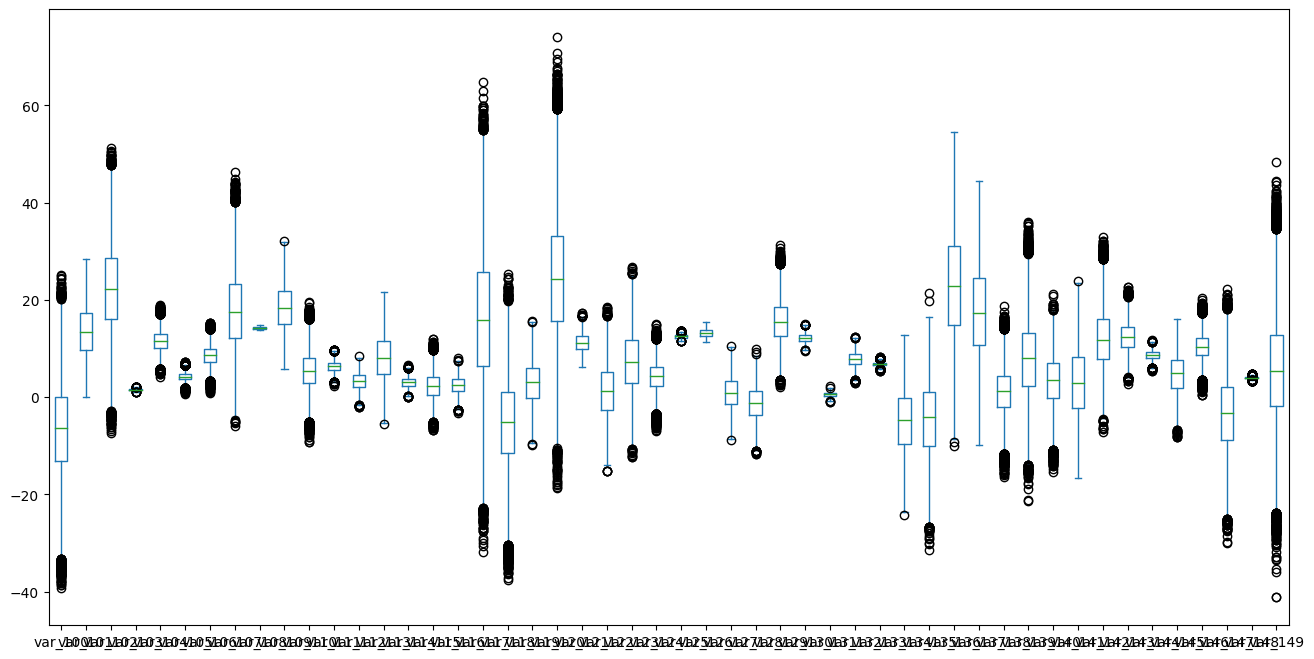

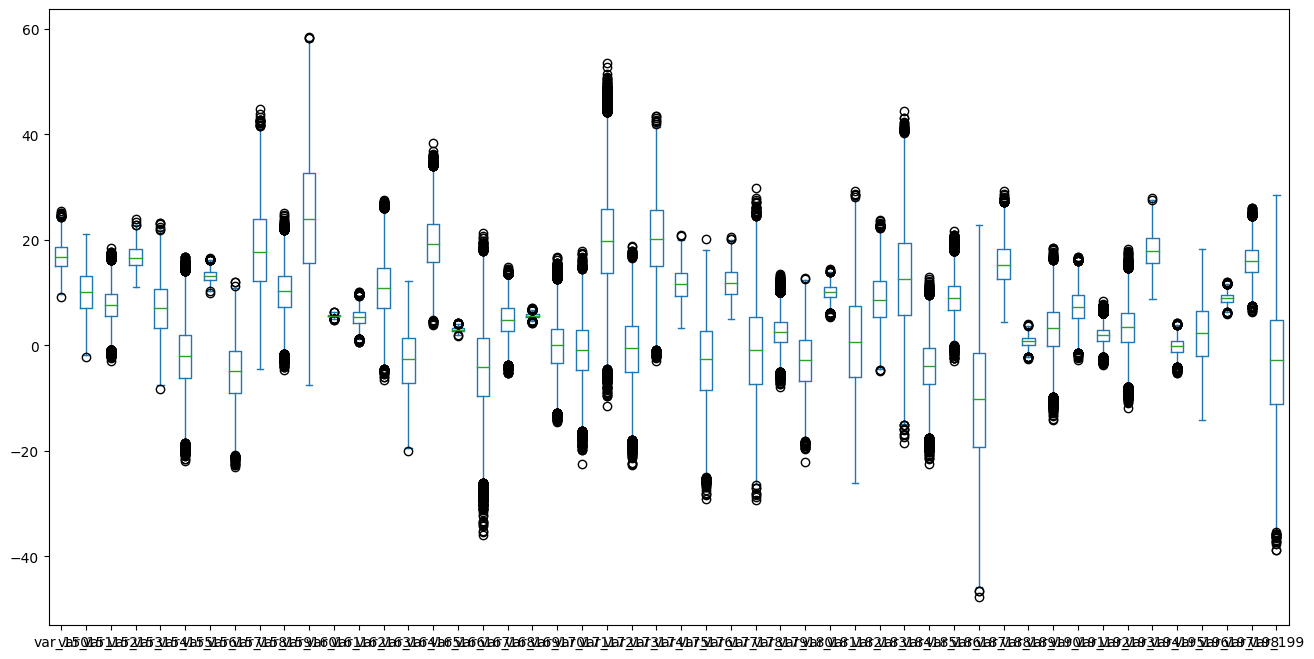

In [ ]:
# Plot  features.
data.iloc[:, 2:50].plot(kind='box', figsize=[16,8])
data.iloc[:, 50:101].plot(kind='box', figsize=[16,8])
data.iloc[:, 101:151].plot(kind='box', figsize=[16,8])
data.iloc[:, 151:].plot(kind='box', figsize=[16,8])

since all the 200 features are numerical values which seems like transaction of particular ID for the last 200 transactions hence there is alot of outliers


# Distribution plot Analysis

<Figure size 640x480 with 0 Axes>

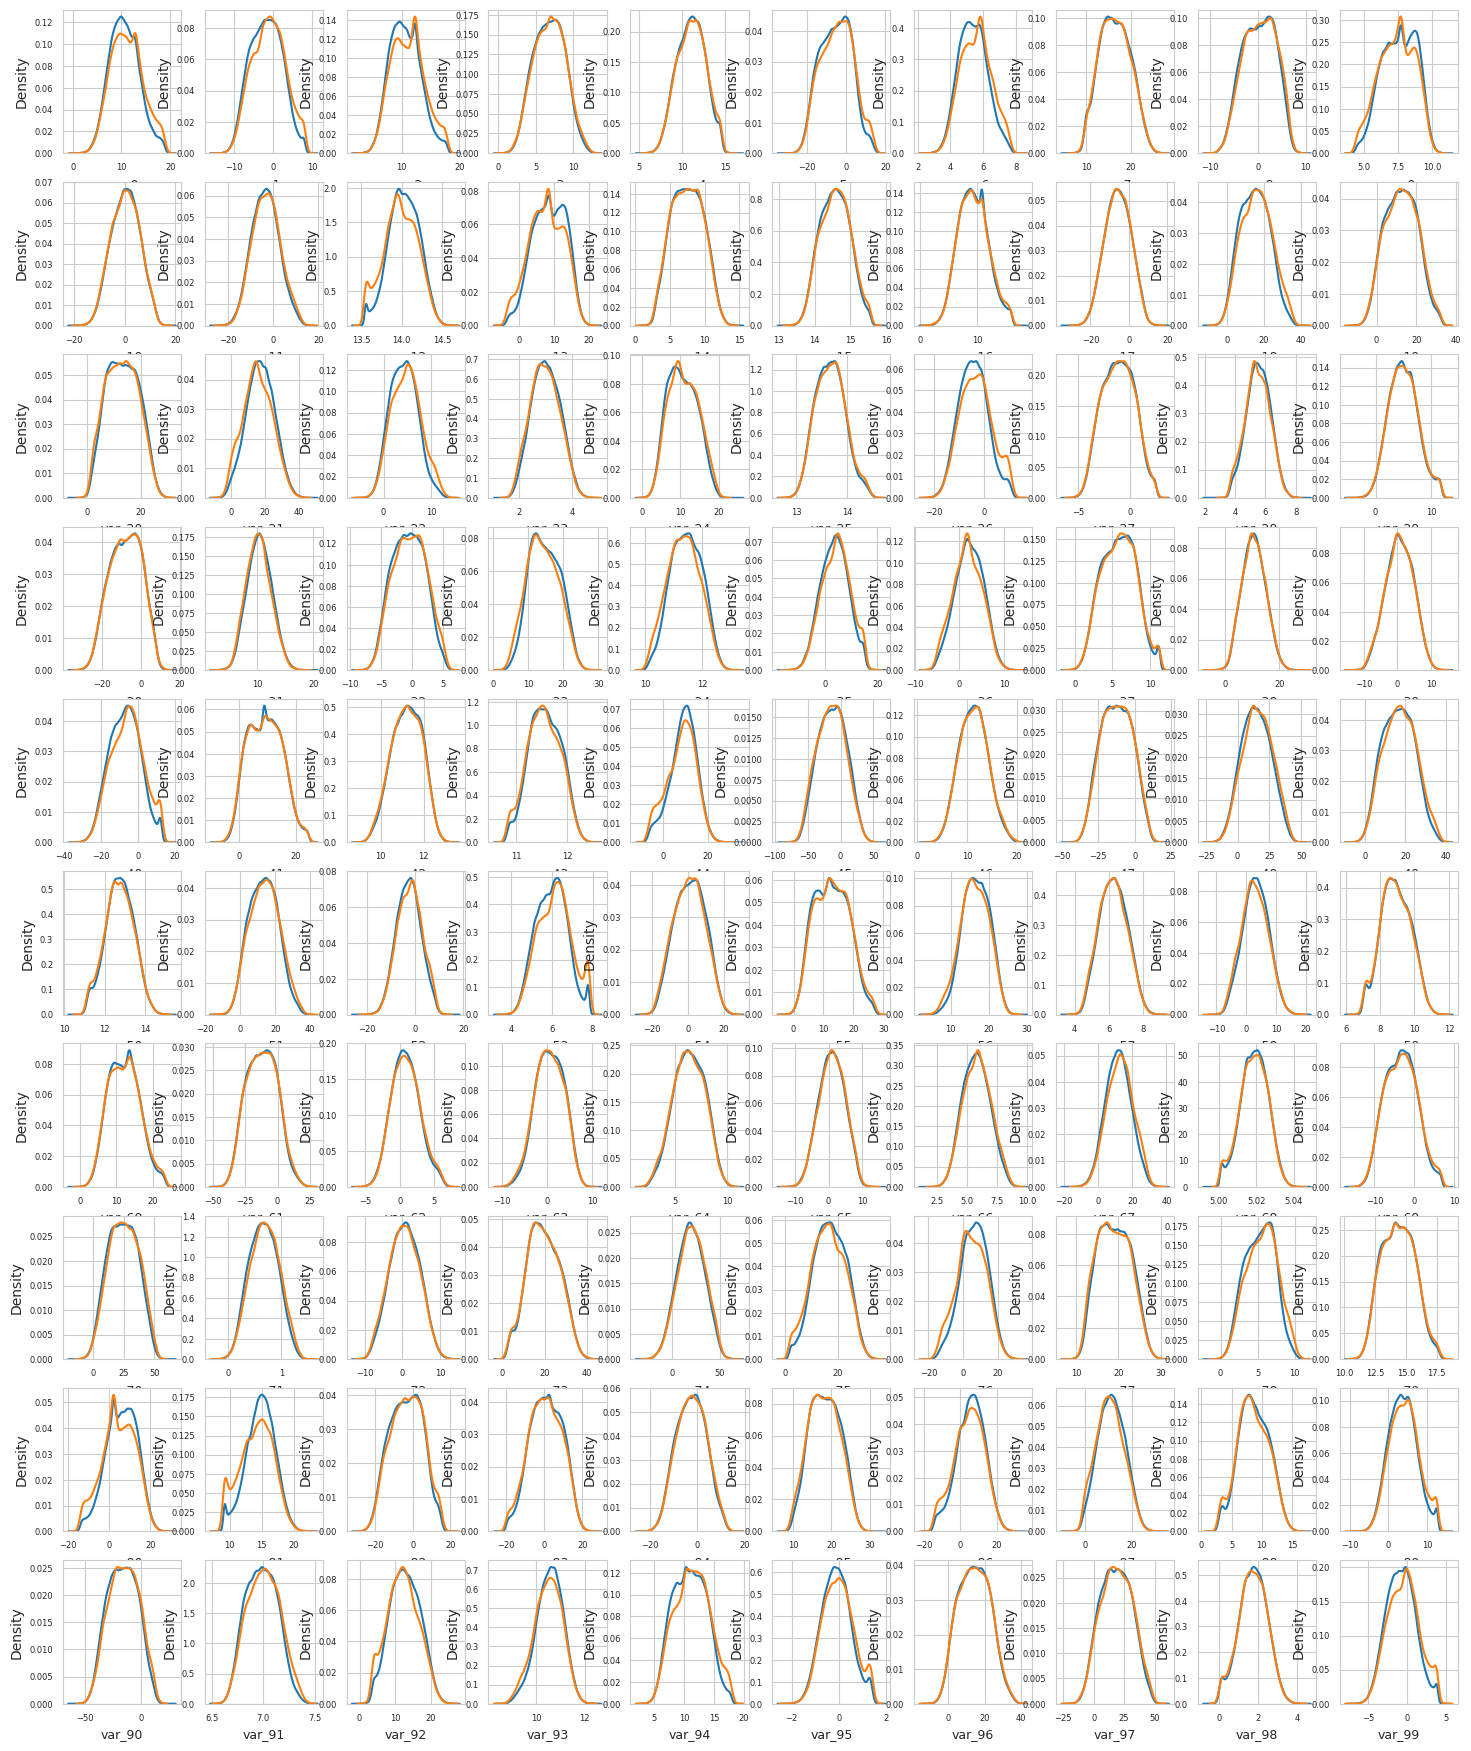

<Figure size 640x480 with 0 Axes>

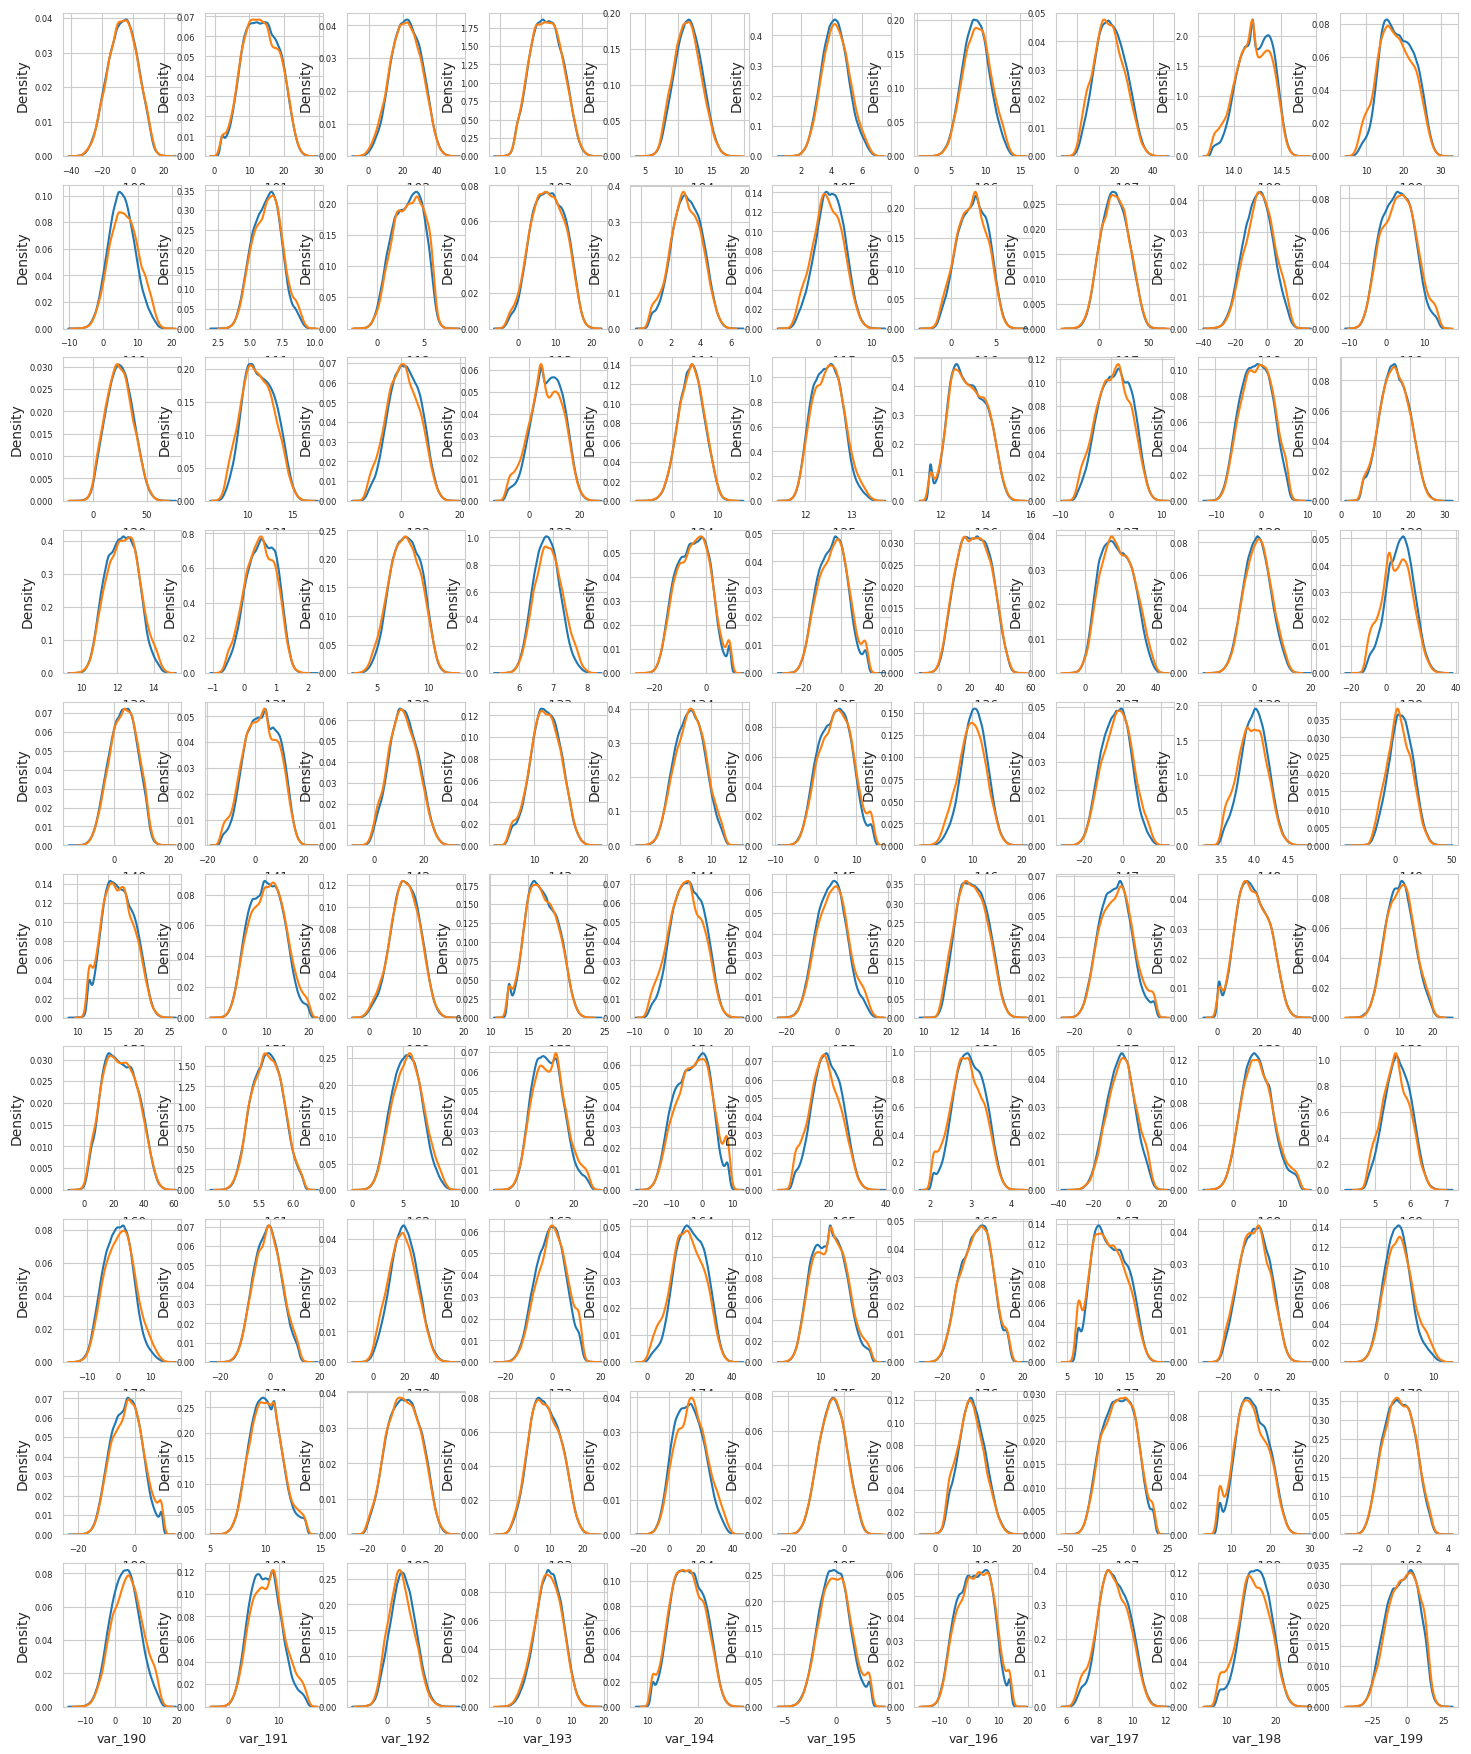

In [ ]:
# Function for quick plot of distribution
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

t0 = data.loc[data['target'] == 0]
t1 = data.loc[data['target'] == 1]
# first 100 features dustribution
features = data.columns.values[1:101]
plot_feature_distribution(t0, t1, '0', '1', features)

# Rest 100 features dustribution
features = data.columns.values[101:]
plot_feature_distribution(t0, t1, '0', '1', features)

# Data Preprocessiing

In [ ]:
# Remove outliers
train_x = data.iloc[:, 1:]
IQR = train_x.quantile(.75) - train_x.quantile(.25)
print("Train.shape:",data.shape)
df_in = data[~((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
df_out = data[((train_x < (train_x.quantile(.25) - 1.5 * IQR)) |(train_x > (train_x.quantile(.75) + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

Train.shape: (200000, 201)
df_in.shape: (175104, 201)
df_out.shape: (24896, 201)


In [ ]:
df_in['target'].value_counts()

0    157999
1     17105
Name: target, dtype: int64

In [ ]:
# splitting the data set into predictors and target
x = df_in.iloc[:,1:]
y = df_in['target']

 since our data has 200000 rows of data with 200 features which computationally expensive so we cant over sample the minority class to majority class, hence we are randomly taking a subset of the majority class which equals to the minority class

# Model Selection and Evaluation

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 157999, 1: 17105})
Resample dataset shape Counter({0: 17105, 1: 17105})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 42 )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27368, 200)
(6842, 200)
(27368,)
(6842,)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27368, 200)
(6842, 200)
(27368,)
(6842,)


In [ ]:
x_train.info

<bound method DataFrame.info of          var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
11778   9.3942 -2.5293   7.5712   7.3275   7.7645  -1.4938  5.5367  20.8341   
29630  11.2558 -8.9403  12.3602   7.0570  11.7544  -2.0664  5.9070  20.4800   
9351   18.1733 -4.1253  12.5007   6.2862  10.0863 -13.1162  5.2463  16.5628   
12564  10.8777 -1.9168  10.0191   7.8245  10.8737  -7.1044  6.5678  21.7113   
22875  10.2954 -1.3977   6.5591   5.6536   9.0356 -11.0734  5.9879  17.0403   
...        ...     ...      ...      ...      ...      ...     ...      ...   
16850   7.1631  3.9152   9.2606  10.8489  10.0174 -17.1739  5.1029  14.1735   
6265    7.0497 -5.6460  13.0953   5.3570  11.0024   7.1625  5.1822  13.8354   
11284   7.7783  3.2775   9.5025   8.7045  11.3043   1.1298  4.3116  16.7285   
860     7.9100  2.7112  11.5065   8.4692  10.0849 -14.6632  5.0455  13.4713   
15795  14.5903 -1.2295  11.3307   5.9565  10.6893 -11.8734  6.5064  15.8064   

        var_8   var

In [ ]:
y_train.info

<bound method Series.info of 11778    0
29630    1
9351     0
12564    0
22875    1
        ..
16850    0
6265     0
11284    0
860      0
15795    0
Name: target, Length: 27368, dtype: int64>

In [ ]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(probability=True, )),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Multi Layer Perceptron', MLPClassifier(random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
]

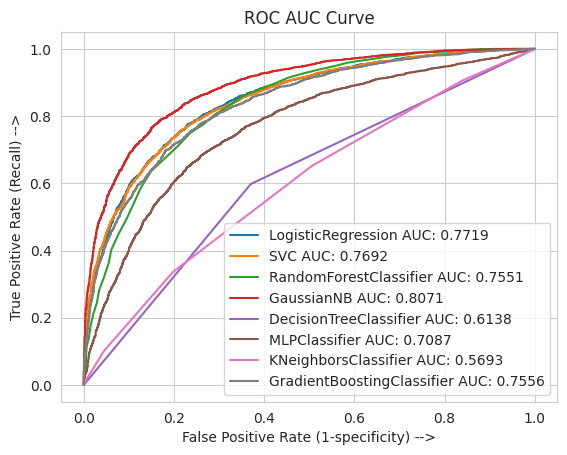

In [ ]:
results = []
for name, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    proba_classifier = classifier.predict_proba(x_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Update pos_label
    recall = recall_score(y_test, y_pred, pos_label=1)  # Update pos_label
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Update pos_label
    auc = roc_auc_score(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1, auc))
    fpr, tpr, thresholds = roc_curve(y_test, proba_classifier)
    plt.plot(fpr, tpr, label='{} AUC: {:.4f}'.format(classifier.__class__.__name__, auc))
plt.xlabel('False Positive Rate (1-specificity) -->')
plt.ylabel('True Positive Rate (Recall) -->')
plt.legend()
plt.title('ROC AUC Curve')
plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc_score'])

In [ ]:
# Suggest the best model for production
best_model = results_df.loc[results_df['F1 Score'].idxmax()]

# Create a report comparing the models and suggesting the best model
model_comparison_report = f"""
Model Comparison Report:

{results_df.to_string(index=False)}

Best Model for Production:
{best_model['Model']} - F1 Score: {best_model['F1 Score']}
"""

print(model_comparison_report)


Model Comparison Report:

                 Model  Accuracy  Precision   Recall  F1 Score  roc_auc_score
   Logistic Regression  0.771850   0.766862 0.773440  0.770137       0.771869
                   SVM  0.769220   0.766096 0.767229  0.766662       0.769197
         Random Forest  0.754896   0.740542 0.775806  0.757764       0.755138
           Naive Bayes  0.807074   0.804252 0.805679  0.804965       0.807058
         Decision Tree  0.614002   0.612053 0.597752  0.604818       0.613814
Multi Layer Perceptron  0.709149   0.720165 0.672878  0.695719       0.708730
                   KNN  0.572055   0.624246 0.336587  0.437356       0.569334
     Gradient Boosting  0.755919   0.767930 0.725229  0.745969       0.755565

Best Model for Production:
Naive Bayes - F1 Score: 0.8049645390070922



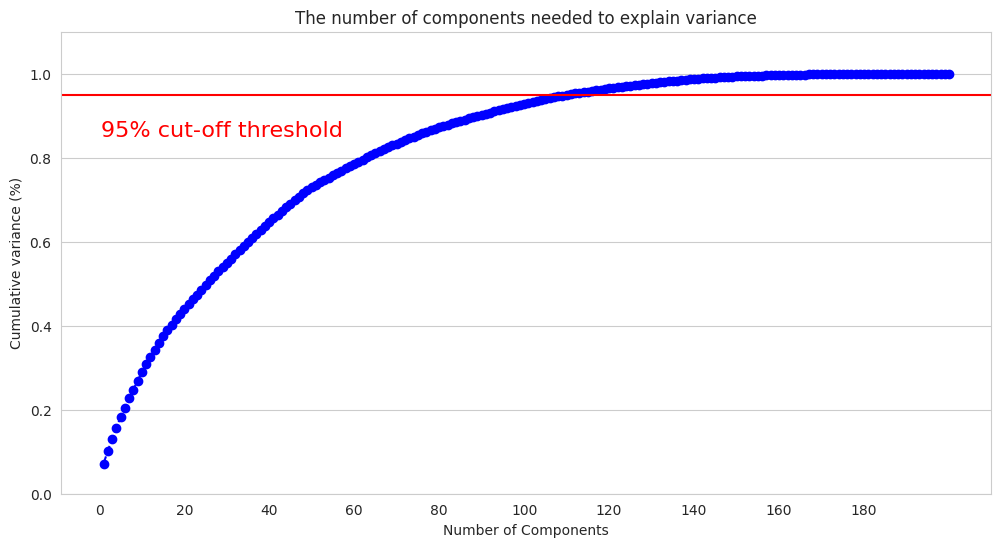

In [ ]:
pca = PCA().fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 201, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=20)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [ ]:
pca = PCA(n_components = 150)

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_


print(explained_variance)
print(X_train_pca.shape)
print(X_test_pca.shape)

[0.07017921 0.03034079 0.02740447 0.02692735 0.0249531  0.0225387
 0.02198451 0.02064226 0.0206225  0.02005853 0.018264   0.01715413
 0.0169157  0.01671574 0.01645162 0.01385653 0.0128939  0.01252237
 0.01237822 0.0119724  0.01193776 0.01165486 0.01157819 0.01145741
 0.01127536 0.01113987 0.01082161 0.01076681 0.01069082 0.0105525
 0.01029793 0.01003548 0.00993337 0.00986351 0.00973792 0.00970659
 0.00963834 0.00956377 0.00944061 0.00926845 0.00920553 0.00895087
 0.00894467 0.0087928  0.00867446 0.00847326 0.00843515 0.00819541
 0.00710939 0.006774   0.00618463 0.00609361 0.00597789 0.00589059
 0.00579433 0.00561068 0.00550451 0.00545409 0.00543377 0.00531359
 0.00520212 0.00507394 0.00504751 0.00499309 0.00488889 0.00474699
 0.00462346 0.00461485 0.0045118  0.00439679 0.00434688 0.0042285
 0.004131   0.0040601  0.00396077 0.00381904 0.00374873 0.00366729
 0.00344775 0.00337151 0.00329367 0.00316247 0.00312524 0.00308874
 0.00304146 0.00302232 0.002973   0.00283872 0.00280739 0.0027978

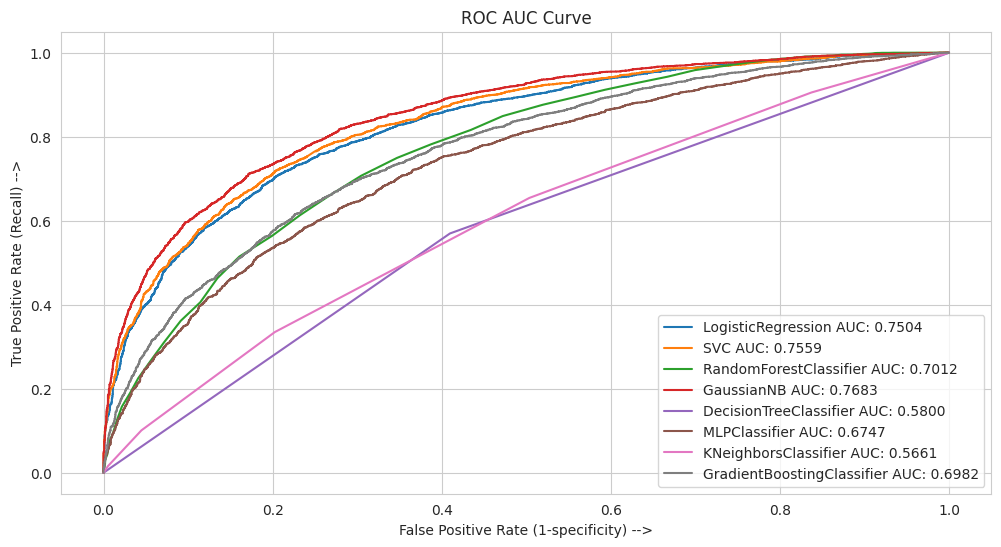

In [ ]:
results = []
for name, classifier in classifiers:
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    proba_classifier = classifier.predict_proba(X_test_pca)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Update pos_label
    recall = recall_score(y_test, y_pred, pos_label=1)  # Update pos_label
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Update pos_label
    auc = roc_auc_score(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1, auc))
    fpr, tpr, thresholds = roc_curve(y_test, proba_classifier)
    plt.plot(fpr, tpr, label='{} AUC: {:.4f}'.format(classifier.__class__.__name__, auc))
plt.xlabel('False Positive Rate (1-specificity) -->')
plt.ylabel('True Positive Rate (Recall) -->')
plt.legend()
plt.title('ROC AUC Curve')
plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc_score'])

In [ ]:
# Suggest the best model for production
best_model = results_df.loc[results_df['F1 Score'].idxmax()]

# Create a report comparing the models and suggesting the best model
model_comparison_report = f"""
Model Comparison Report:

{results_df.to_string(index=False)}

Best Model for Production:
{best_model['Model']} - F1 Score: {best_model['F1 Score']}
"""

print(model_comparison_report)


Model Comparison Report:

                 Model  Accuracy  Precision   Recall  F1 Score  roc_auc_score
   Logistic Regression  0.750365   0.743806 0.754806  0.749266       0.750417
                   SVM  0.755919   0.754084 0.750961  0.752519       0.755862
         Random Forest  0.701111   0.693961 0.706891  0.700366       0.701178
           Naive Bayes  0.768196   0.760220 0.775510  0.767789       0.768281
         Decision Tree  0.580094   0.575957 0.569654  0.572788       0.579973
Multi Layer Perceptron  0.674657   0.669206 0.675540  0.672358       0.674667
                   KNN  0.568840   0.617567 0.334812  0.434216       0.566135
     Gradient Boosting  0.698334   0.698403 0.685596  0.691940       0.698187

Best Model for Production:
Naive Bayes - F1 Score: 0.7677891654465593



In [ ]:
# Scaling the predictors and checking the results
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

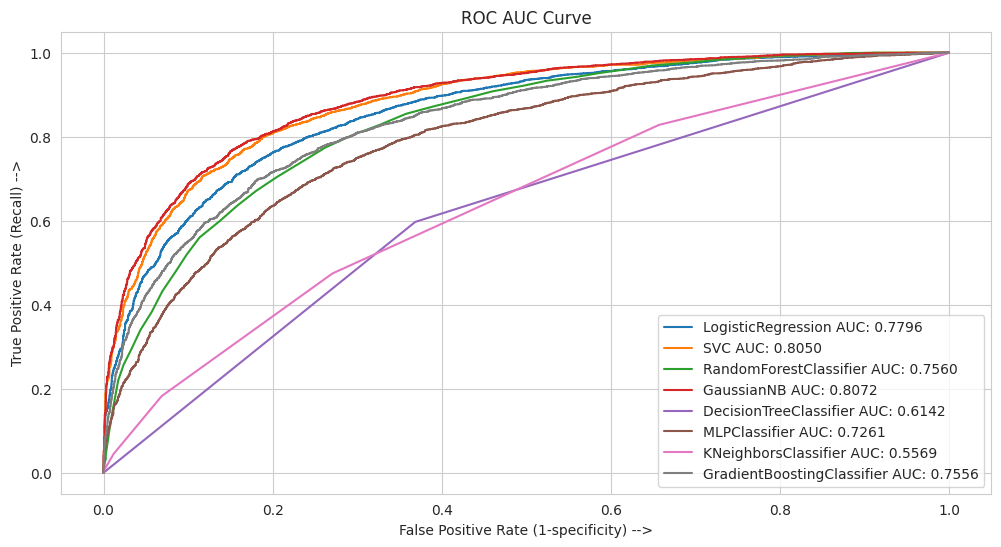

In [ ]:
results = []
for name, classifier in classifiers:
    classifier.fit(x_train_scaled, y_train)
    y_pred = classifier.predict(x_test_scaled)
    proba_classifier = classifier.predict_proba(x_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Update pos_label
    recall = recall_score(y_test, y_pred, pos_label=1)  # Update pos_label
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Update pos_label
    auc = roc_auc_score(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1, auc))
    fpr, tpr, thresholds = roc_curve(y_test, proba_classifier)
    plt.plot(fpr, tpr, label='{} AUC: {:.4f}'.format(classifier.__class__.__name__, auc))
plt.xlabel('False Positive Rate (1-specificity) -->')
plt.ylabel('True Positive Rate (Recall) -->')
plt.legend()
plt.title('ROC AUC Curve')
plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc_score'])

In [ ]:
# Suggest the best model for production
best_model = results_df.loc[results_df['F1 Score'].idxmax()]

# Create a report comparing the models and suggesting the best model
model_comparison_report = f"""
Model Comparison Report:

{results_df.to_string(index=False)}

Best Model for Production:
{best_model['Model']} - F1 Score: {best_model['F1 Score']}
"""

print(model_comparison_report)


Model Comparison Report:

                 Model  Accuracy  Precision   Recall  F1 Score  roc_auc_score
   Logistic Regression  0.779597   0.773112 0.784088  0.778561       0.779649
                   SVM  0.805028   0.803980 0.800651  0.802312       0.804977
         Random Forest  0.755773   0.742484 0.774327  0.758072       0.755988
           Naive Bayes  0.807220   0.804309 0.805975  0.805141       0.807206
         Decision Tree  0.614440   0.612747 0.597161  0.604853       0.614241
Multi Layer Perceptron  0.726103   0.722468 0.723750  0.723109       0.726076
                   KNN  0.561239   0.721637 0.182490  0.291313       0.556862
     Gradient Boosting  0.755919   0.767930 0.725229  0.745969       0.755565

Best Model for Production:
Naive Bayes - F1 Score: 0.8051410843551484



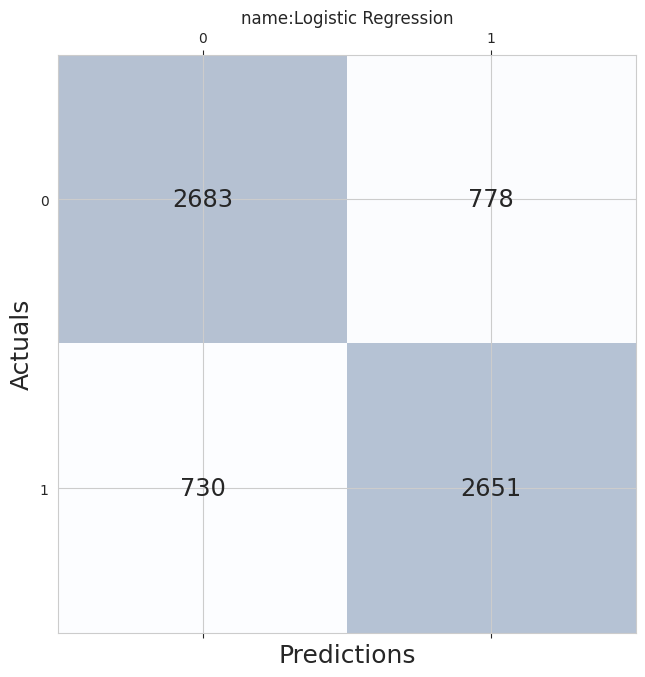

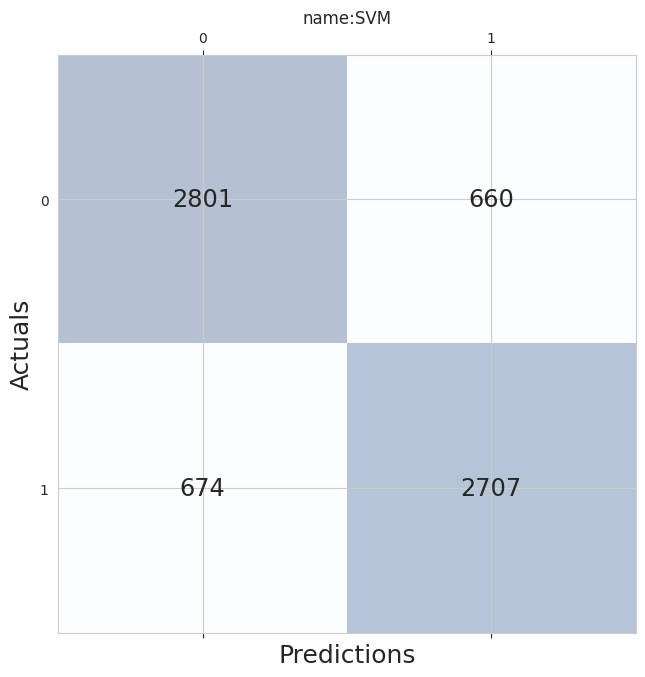

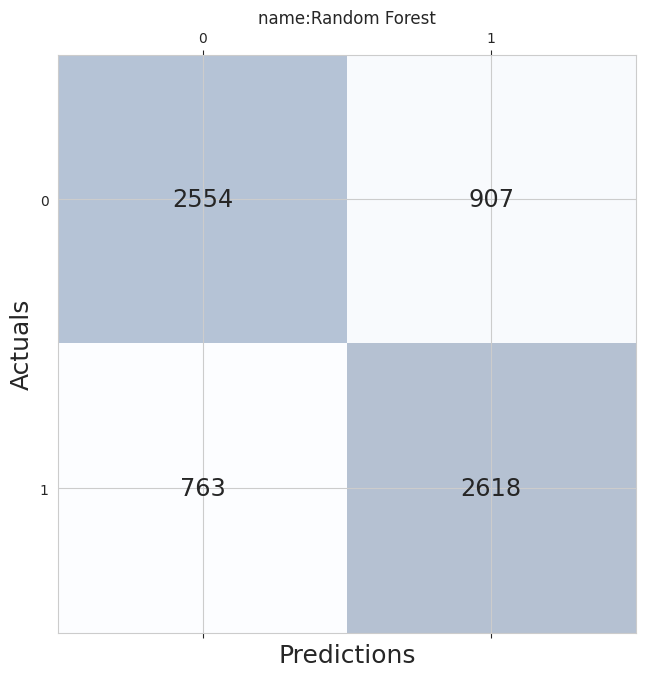

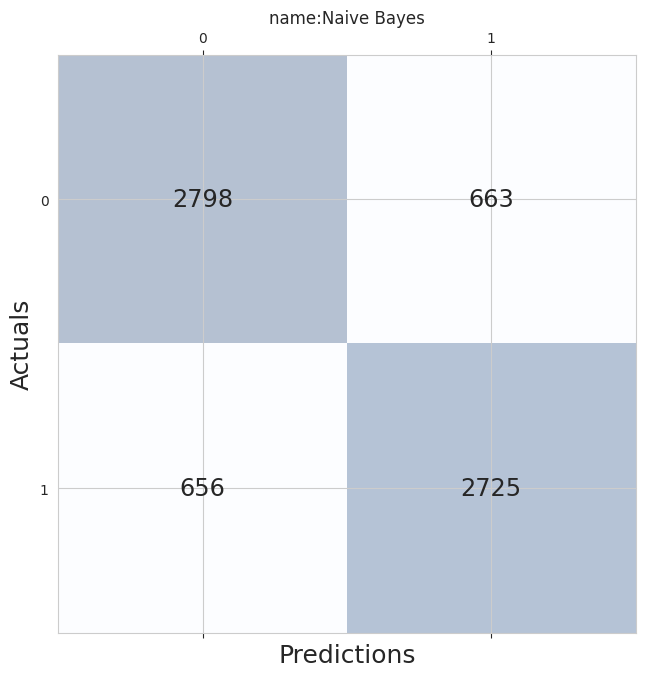

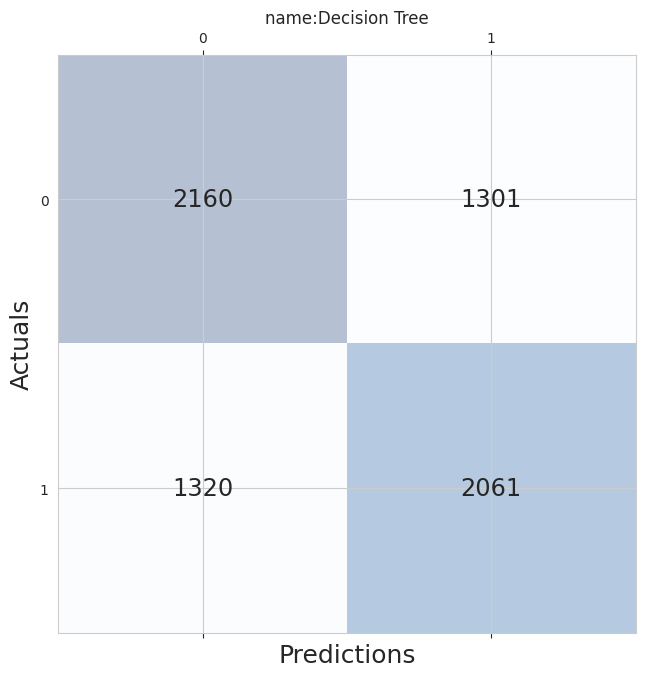

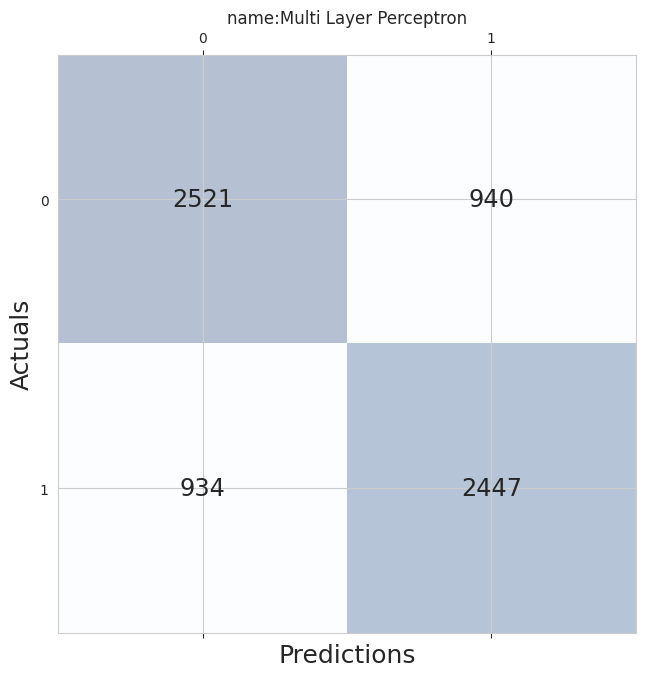

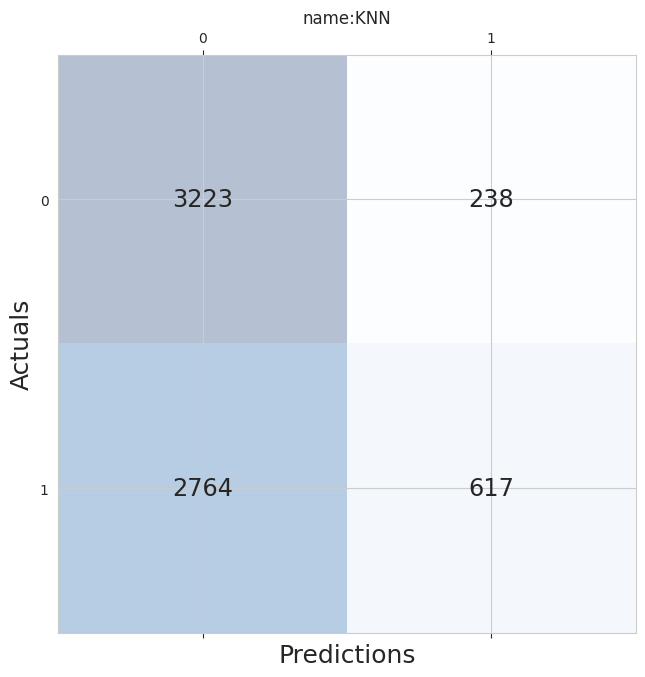

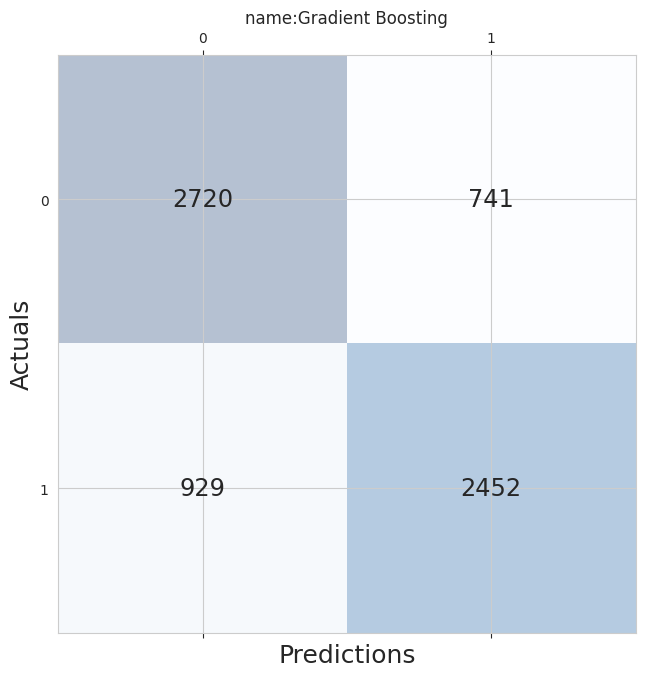

In [ ]:
# plotting confusion matrix for each model
for name, classifier in classifiers:
    classifier.fit(x_train_scaled, y_train)
    y_pred = classifier.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm , cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    plt.title('name:{}'.format(name))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.show()

In [ ]:
data.duplicated().sum()

0

In [ ]:
#cheacking the percentage of the null values in the data
null_values=data.isna().sum()
total_shells=np.product(data.shape)
total_missing_values=null_values.sum()
percentage_missing_values=(total_missing_values/total_shells)*100
print(f'The data contains {percentage_missing_values} of values')

# Handling missing values
data.dropna(inplace=True)
data.shape

The data contains 0.0 of values


(200000, 201)

In [ ]:
X = data.iloc[:,1:]
Y = data['target']

In [ ]:
rus_out = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_out, Y_out = rus.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(Y_out))

original dataset shape: Counter({0: 179902, 1: 20098})
Resample dataset shape Counter({0: 20098, 1: 20098})


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_out, Y_out, test_size = 0.2, random_state = 42 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32156, 200)
(8040, 200)
(32156,)
(8040,)


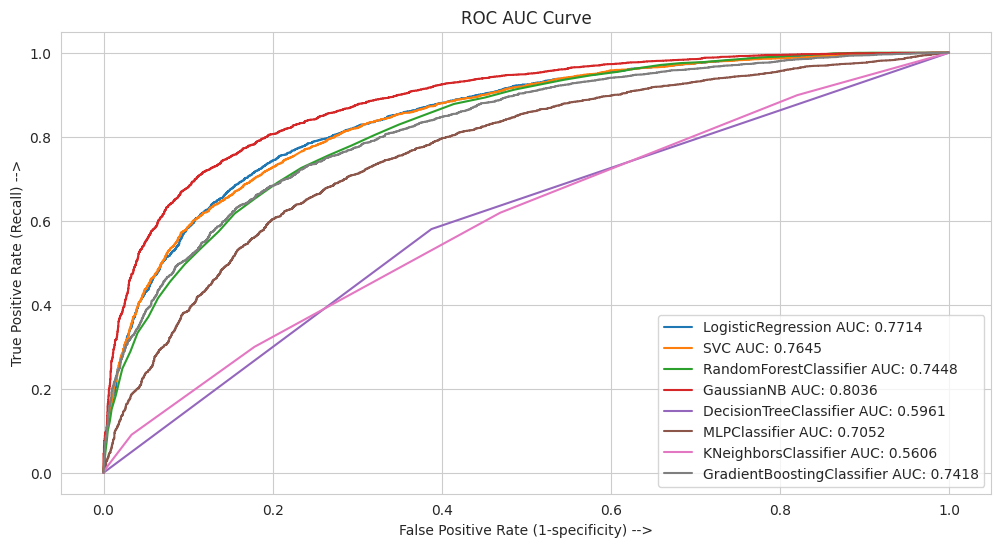

In [ ]:
# we are inlcuding outliers as well and testing for the same
results = []
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    proba_classifier = classifier.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Update pos_label
    recall = recall_score(y_test, y_pred, pos_label=1)  # Update pos_label
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Update pos_label
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1, auc,cm))
    fpr, tpr, thresholds = roc_curve(y_test, proba_classifier)
    plt.plot(fpr, tpr, label='{} AUC: {:.4f}'.format(classifier.__class__.__name__, auc))
plt.xlabel('False Positive Rate (1-specificity) -->')
plt.ylabel('True Positive Rate (Recall) -->')
plt.legend()
plt.title('ROC AUC Curve')
plt.show()

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc_score','Confusion_Matrix'])

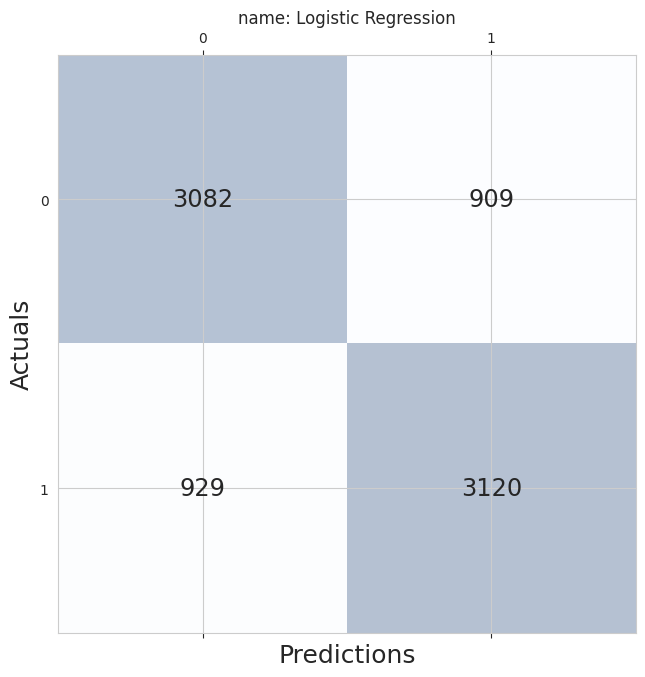

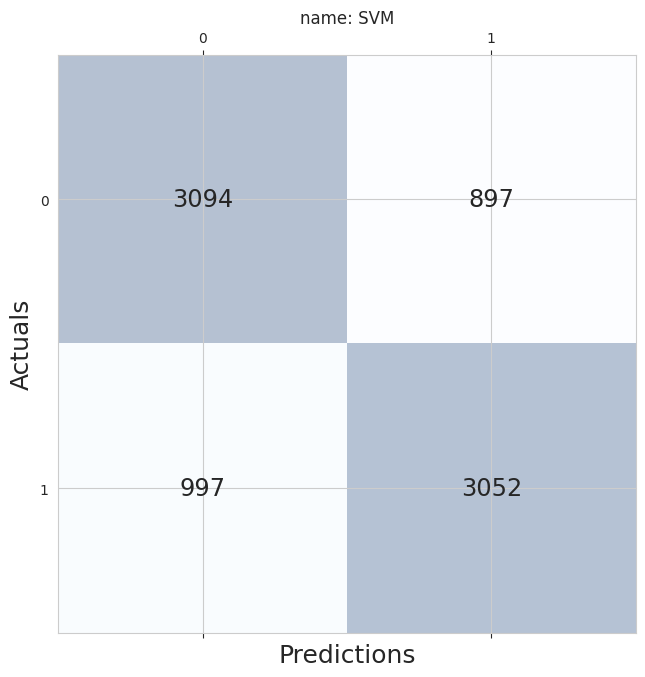

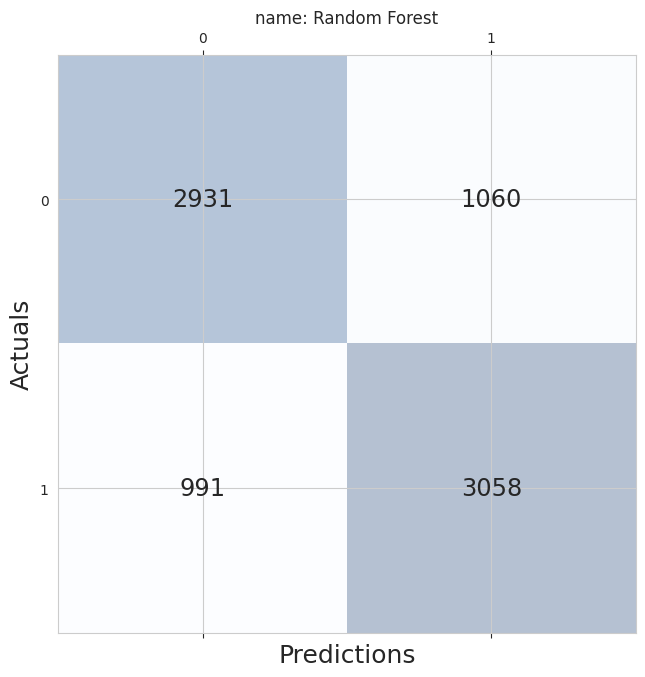

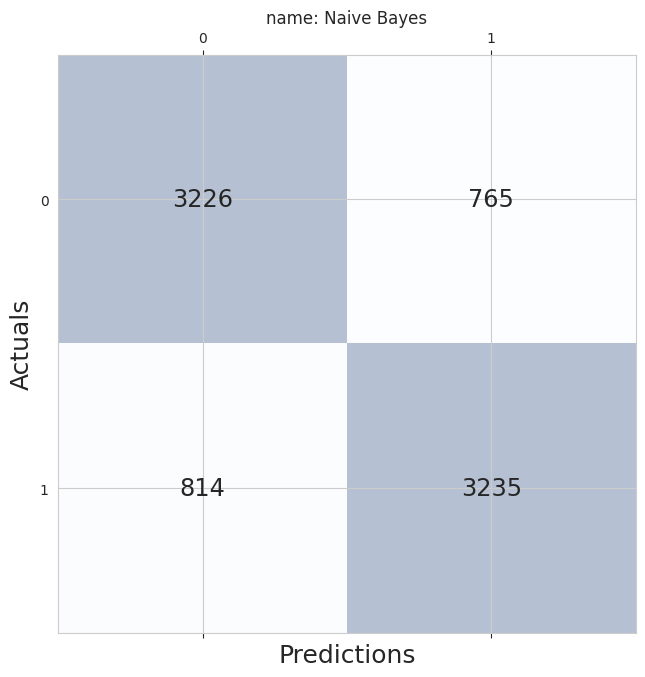

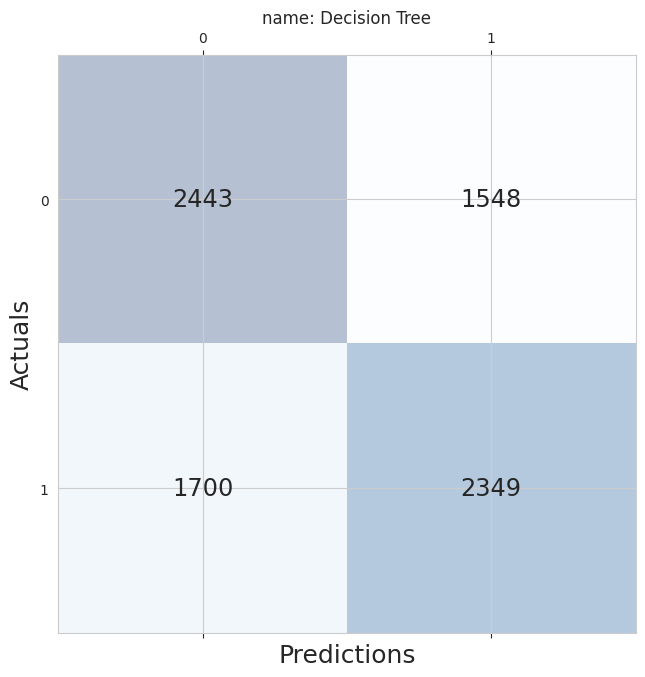

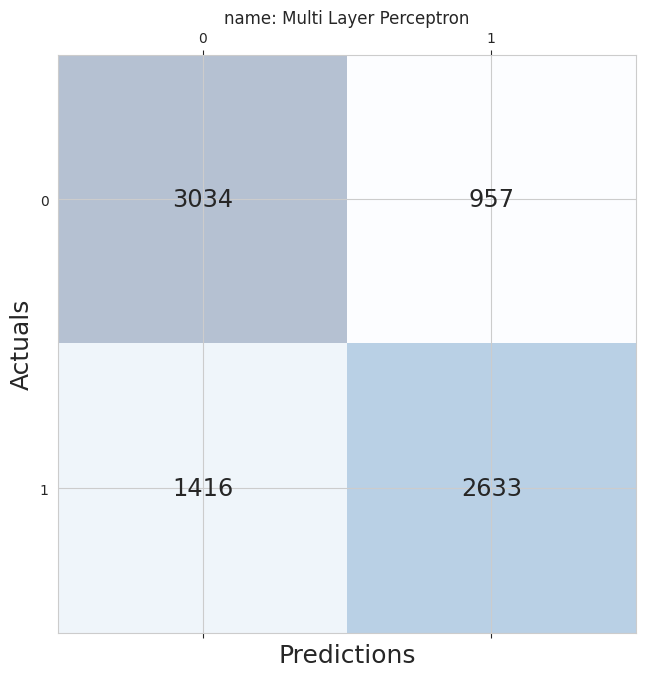

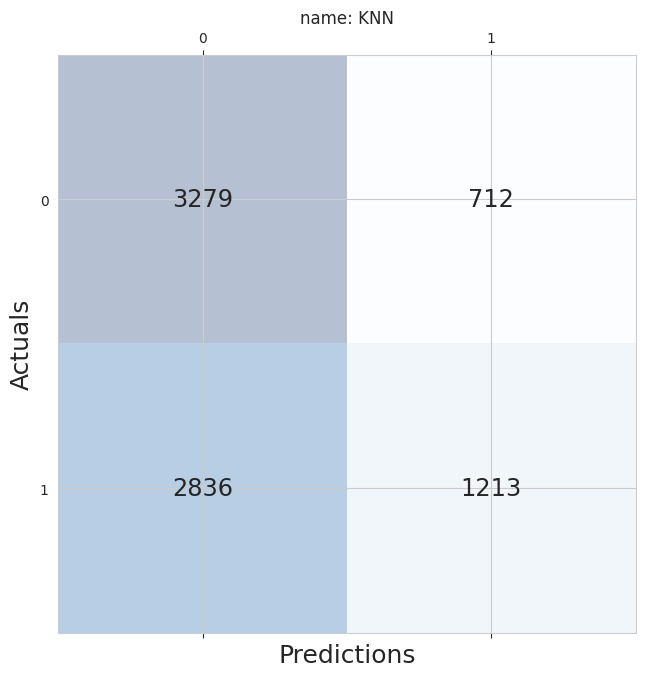

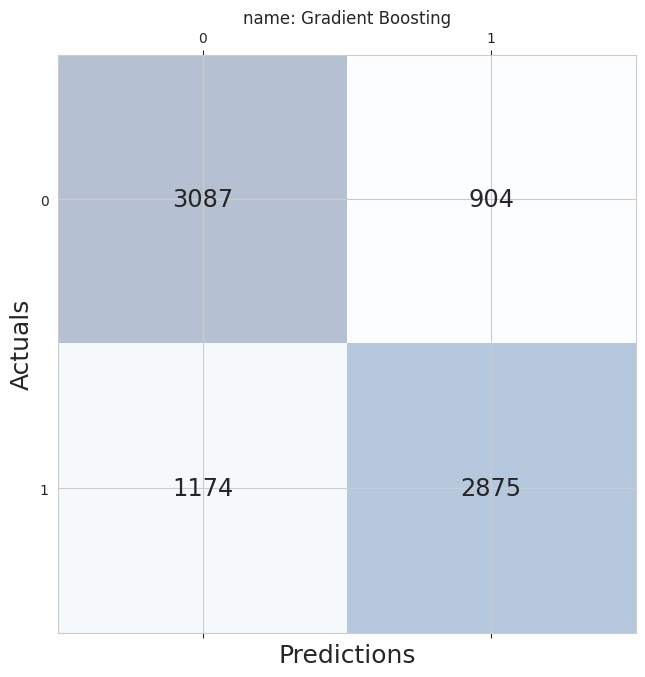

In [ ]:
cm = results_df.iloc[:, [0, 6]]
cm = np.array(cm)
for Model in cm:
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(Model[1], cmap=plt.cm.Blues, alpha=0.3)
    for i in range(Model[1].shape[0]):
        for j in range(Model[1].shape[1]):
            ax.text(x=j, y=i, s=Model[1][i, j], va='center', ha='center', size='xx-large')
    plt.title('name: {}'.format(Model[0]))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.show()


# Model Comparison Report

In [ ]:
# Based on the evaluation results, suggest the best model for production
best_model = results_df.loc[results_df['F1 Score'].idxmax()]

In [ ]:
# Suggest the best model for production
best_model = results_df.loc[results_df['F1 Score'].idxmax()]

# Create a report comparing the models and suggesting the best model
model_comparison_report = f"""
Model Comparison Report:

{results_df.to_string(index=False)}

Best Model for Production:
{best_model['Model']} - F1 Score: {best_model['F1 Score']}
"""

print(model_comparison_report)


Model Comparison Report:

                 Model  Accuracy  Precision   Recall  F1 Score  roc_auc_score             Confusion_Matrix
   Logistic Regression  0.771393   0.774386 0.770561  0.772468       0.771399   [[3082, 909], [929, 3120]]
                   SVM  0.764428   0.772854 0.753766  0.763191       0.764505   [[3094, 897], [997, 3052]]
         Random Forest  0.744900   0.742593 0.755248  0.748867       0.744825  [[2931, 1060], [991, 3058]]
           Naive Bayes  0.803607   0.808750 0.798963  0.803827       0.803641   [[3226, 765], [814, 3235]]
         Decision Tree  0.596020   0.602771 0.580143  0.591241       0.596135 [[2443, 1548], [1700, 2349]]
Multi Layer Perceptron  0.704851   0.733426 0.650284  0.689357       0.705247  [[3034, 957], [1416, 2633]]
                   KNN  0.558706   0.630130 0.299580  0.406093       0.560589  [[3279, 712], [2836, 1213]]
     Gradient Boosting  0.741542   0.760783 0.710052  0.734543       0.741771  [[3087, 904], [1174, 2875]]

Best Mode

# Classifier Evolution Metrics

Accuracy:  40.0
F1 Score:  40.0
Recall:  50.0
Precision:  33.33333333333333
ROC AUC: 41.666666666666664


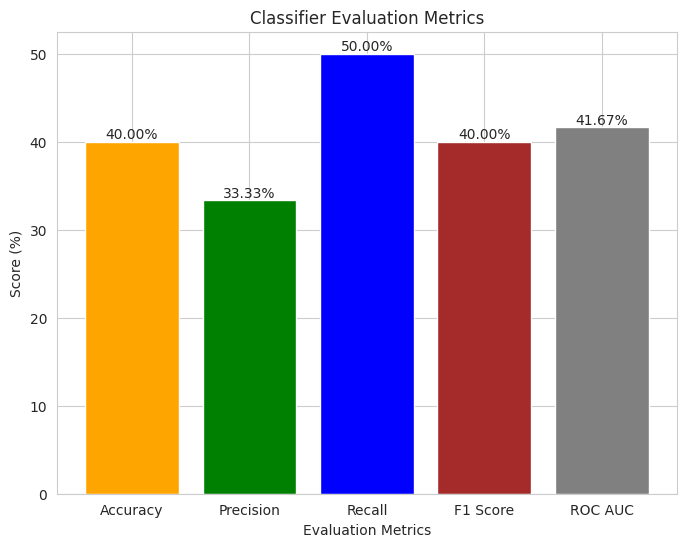

In [ ]:
# Define your data (y_test_enc and y_pred)
# Replace these with your actual data
y_test_enc = [0, 1, 0, 1, 0]
y_pred = [0, 1, 1, 0, 1]

# Calculate the evaluation metrics
classifier_acc = accuracy_score(y_test_enc, y_pred) * 100
classifier_f1 = f1_score(y_test_enc, y_pred) * 100
classifier_recall = recall_score(y_test_enc, y_pred) * 100
classifier_precision = precision_score(y_test_enc, y_pred) * 100
classifier_auc = roc_auc_score(y_test_enc, y_pred) * 100

# Print the accuracy, f1 score, recall, and precision
print('Accuracy: ', classifier_acc)
print('F1 Score: ', classifier_f1)
print('Recall: ', classifier_recall)
print('Precision: ', classifier_precision)
print('ROC AUC:', classifier_auc)

# Create a bar plot of the evaluation metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
metrics_scores = [classifier_acc, classifier_precision, classifier_recall, classifier_f1, classifier_auc]
color = ['orange', 'green', 'blue', 'brown', 'gray']

# Round the values of the bars to two decimal places
metrics_scores = [round(x, 2) for x in metrics_scores]
plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_scores, color=color)

# Calculate percentages and add them on top of bars
for i, value in enumerate(metrics_scores):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Evaluation Metrics')
plt.ylabel('Score (%)')
plt.title('Classifier Evaluation Metrics')
plt.show()

# Hyperparameter Report

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Multi Layer Perceptron": MLPClassifier(random_state=0),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Define the hyperparameter search spaces
param_grid = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', '13']},
    "Decision Tree": {'criterion': ['gini', 'entropy'],
                      'max_depth': [2, 3, 5, 10, 20],
                      'min_samples_leaf': [5, 10, 20, 50, 100]},
    "SVM": {'C': [0.001, 1000], 'kernel': ["rbf", "linear"]},
    "KNN": {"n_neighbors": [3, 5, 10], "weights": ["uniform", "distance"]},
    "Random Forest": {"n_estimators": [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
                      "max_features": ['auto', 'sqrt', 'log2'],
                      "max_depth": [int(x) for x in np.linspace(10, 1000, 10)],
                      "min_samples_split": [2, 5, 10, 14],
                      "min_samples_leaf": [1, 2, 4, 6, 8],
                      "random_state": [0, 42]},
    "Multi Layer Perceptron": {'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
                                'activation': ['relu', 'tanh'],
                                'alpha': [0.0001, 0.001, 0.01],
                                'learning_rate': ['constant', 'invscaling', 'adaptive'],
                                'max_iter': [100, 200, 300]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200],
                           'learning_rate': [0.01, 0.1, 0.2],
                           'max_depth': [3, 4, 5],
                           'min_samples_split': [2, 3, 4],
                           'min_samples_leaf': [1, 2, 3],
                           'subsample': [0.8, 0.9, 1.0]},
    "Naive Bayes": {'priors': [[0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]}
}


X, y = np.random.rand(100, 5), np.random.randint(2, size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_models = {}

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    cv = RandomizedSearchCV(model, param_distributions=param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    cv.fit(X_train, y_train)
    best_model = cv.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{name}:\nBest Parameters: {cv.best_params_}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:}")

    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    print(f"{name}:\nBest Parameters: {cv.best_params_}")
    print(f"Train Score: {train_score:.4f}, Test Score: {test_score:.4f}\n")

Tuning hyperparameters for Logistic Regression...
Logistic Regression:
Best Parameters: {'penalty': 'l2', 'C': 1}
Accuracy: 0.7000
F1 score: 0.6901
ROC AUC: 0.6666666666666666
Logistic Regression:
Best Parameters: {'penalty': 'l2', 'C': 1}
Train Score: 0.6000, Test Score: 0.7000

Tuning hyperparameters for SVM...
SVM:
Best Parameters: {'kernel': 'linear', 'C': 1000}
Accuracy: 0.6500
F1 score: 0.6453
ROC AUC: 0.625
SVM:
Best Parameters: {'kernel': 'linear', 'C': 1000}
Train Score: 0.6000, Test Score: 0.6500

Tuning hyperparameters for Random Forest...
Random Forest:
Best Parameters: {'random_state': 42, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 670}
Accuracy: 0.6000
F1 score: 0.5868
ROC AUC: 0.5625
Random Forest:
Best Parameters: {'random_state': 42, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 670}
Train Score: 0.7500, Test Score: 0.6000

Tuning hyperparameters f

In [ ]:
# Choose the best model for production based on hyperparameter tuning
best_model_name = max(best_models, key=lambda k: best_models[k].score(X_test, y_test))
best_model = best_models[best_model_name]

print(f"Best Model for Production: {best_model_name}")


Best Model for Production: Logistic Regression


# Conclusion
* We have an anonymized dataset of 200,000 data points with 202 features in which 200 features are numerical
* The dataset is highly imbalanced, which means that there are many more data points for one class than for the other class. This can make it difficult to train a model that can accurately predict the minority class.
* There are no missing values in the dataset, which is good. Missing values can make it difficult to train a model and can introduce bias.
* There are a small number of outliers in the dataset. Outliers are data points that are significantly different from the rest of the data. They can also make it difficult to train a model and can introduce bias.
* There is very low correlation between the features. This means that the features are not very related to each other. This can make it difficult to train a model that can accurately predict the target variable.
* The best model without any feature engineering is Naive Bayes. This is a simple model that is often used for classification problems with imbalanced datasets.
* The best model with hyperparameter tuning is logistic regression. This is a more complex model that can be more accurate than Naive Bayes.

Overall, the dataset is challenging to work with due to the high imbalance and low correlation between the features. However, the logistic regression model with hyperparameter tuning was able to achieve the best results.

# Task 5: Challenges Faced and Techniques Used Report
challenges_report = """
Challenges Faced and Techniques Used Report:

Challenges Faced:
1. Anonymized Features: The dataset contains anonymized features, making it challenging to interpret the meaning of each feature. As a result, we cannot perform extensive exploratory data analysis (EDA) to understand feature relationships.

2. Imbalanced Data: The distribution of target classes shows an imbalance, with significantly more instances of one class compared to the other. This imbalance may lead to biased model training and evaluation. We addressed this issue by using appropriate evaluation metrics like precision, recall, and F1-score, which consider both true positive and false positive rates.

3. Model Selection: With 200 features in the dataset, selecting the appropriate model and hyperparameters can be time-consuming and computationally intensive. We used a variety of classifiers to find the best-performing model.

Techniques Used:
1. Data Scaling: We applied standard scaling to the features to ensure that all features have a similar range and do not dominate the model training process.

2. Model Evaluation Metrics: Instead of solely relying on accuracy, we used precision, recall, and F1-score to assess the models' performance, especially in the context of imbalanced data.

3. Train-Test Split: We split the data into training and testing sets to evaluate the models' generalization performance and avoid overfitting.

Overall, by addressing the challenges and using appropriate techniques, we have developed a predictive model to identify customers likely to make transactions in the future.
"""

print(challenges_report)
